In [57]:
import pickle5
import pandas as pd
import numpy as np

from itertools import repeat

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py

import plotly.express as px

from plotly.offline import init_notebook_mode, plot_mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


In [58]:
with open('../results_nurion/adsorbate_analysis/df_summary_001_080.pkl', 'rb') as f:
    data = pickle5.load(f)
# print(data)
df = pd.DataFrame(data)
df

,formula,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,convg_OOH,...,time_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,time_OH
1,SrTcO3,True,-386.83,0,0,13.642,1,"[[0. 1.98022307 0. ] O, [1.9802...",NaN,True,...,NaN,True,-398.741,-1.077,-0.782,10.772,-2.871,104,"[[ 1.08924803 2.12199985 10.29190122] H, [0. ...",NaN
2,BaFeO3,True,-316.788,0,0,59.992,1,"[[2.0165225 2.0165225 2.0165225] Ba, [2.016522...",NaN,True,...,NaN,True,-325.893,1.729,2.024,58.79,-1.202,135,"[[2.0165225 2.0165225 2.0165225] Ba, [1.998014...",NaN
3,BaMoO3,True,-359.32,0,0,24,1,"[[2.06811213 2.06811213 2.06811213] Ba, [2.068...",NaN,True,...,NaN,True,-370.751,-0.597,-0.302,23,-1,74,"[[2.06811213 2.06811213 2.06811213] Ba, [2.090...",NaN
4,KTaO3,True,-438.376,0,0,0,1,"[[2.01423343 2.01423343 2.01423343] K, [2.0142...",NaN,True,...,NaN,True,-450.506,-1.296,-1.001,0.991,0.991,67,"[[ 7.21096101 0.38768809 10.5776824 ] H, [2.0...",NaN
5,BaZrO3,True,-438.828,0,0,0,1,"[[0. 0. 2.11804015] Ba, [8.472...",NaN,True,...,NaN,True,-448.668,0.995,1.29,0.216,0.216,112,"[[0. 0. 2.11804015] Ba, [0.064...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RbPdO3,True,-237.862,0,0,24.444,1,"[[0. 2.05243462 0. ] O, [2.0524...",NaN,True,...,NaN,True,-247.677,1.018,1.313,22,-2.444,126,"[[ 0.08219953 7.29743334 10.52365441] H, [0. ...",NaN
77,CaHfO3,True,-456.965,0,0,-0,1,"[[0. 0. 2.0506531] Ca, [3.755119...",NaN,True,...,NaN,True,-467.476,0.324,0.619,0.059,0.059,148,"[[0. 0. 2.0506531] Ca, [0.225467...",NaN
78,TlWO3,True,-326.169,0,0,16,26,"[[2.038601 0. 0. ] O, [0. 2.0...",NaN,True,...,NaN,True,-338.705,-1.702,-1.407,15,-1,130,"[[ 2.06261209 1.13741873 10.68303356] H, [2.0...",NaN
79,RbWO3,True,-331.043,0,0,16,1,"[[0. 0. 2.03151098] O, [2.0315...",NaN,True,...,NaN,True,-343.287,-1.41,-1.115,15,-1,78,"[[ 8.0649423 7.29799559 10.66649638] H, [0. ...",NaN


In [59]:
df['mag_ini'] = 'FM'
df.columns.values

array(['formula', 'convg_bare', 'tot_E_bare', 'DE_bare', 'DG_bare',
       'bare_mag', 'nsteps_bare', 'struc_bare', 'time_bare', 'convg_OOH',
       'tot_E_OOH', 'DE_OOH', 'DG_OOH', 'OOH_mag', 'OOH_dmag',
       'nsteps_OOH', 'struc_OOH', 'time_OOH', 'convg_O', 'tot_E_O',
       'DE_O', 'DG_O', 'O_mag', 'O_dmag', 'nsteps_O', 'struc_O', 'time_O',
       'convg_OH', 'tot_E_OH', 'DE_OH', 'DG_OH', 'OH_mag', 'OH_dmag',
       'nsteps_OH', 'struc_OH', 'time_OH', 'mag_ini'], dtype=object)

In [60]:
columns = ['formula', 'mag_ini','convg_bare', 'tot_E_bare', 'DE_bare', 'DG_bare',
       'bare_mag', 'nsteps_bare', 'struc_bare', 'time_bare', 'convg_OOH',
       'tot_E_OOH', 'DE_OOH', 'DG_OOH', 'OOH_mag', 'OOH_dmag',
       'nsteps_OOH', 'struc_OOH', 'time_OOH', 'convg_O', 'tot_E_O',
       'DE_O', 'DG_O', 'O_mag', 'O_dmag', 'nsteps_O', 'struc_O', 'time_O',
       'convg_OH', 'tot_E_OH', 'DE_OH', 'DG_OH', 'OH_mag', 'OH_dmag',
       'nsteps_OH', 'struc_OH', 'time_OH']
df = df[columns]
df

,formula,mag_ini,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,...,time_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,time_OH
1,SrTcO3,FM,True,-386.83,0,0,13.642,1,"[[0. 1.98022307 0. ] O, [1.9802...",NaN,...,NaN,True,-398.741,-1.077,-0.782,10.772,-2.871,104,"[[ 1.08924803 2.12199985 10.29190122] H, [0. ...",NaN
2,BaFeO3,FM,True,-316.788,0,0,59.992,1,"[[2.0165225 2.0165225 2.0165225] Ba, [2.016522...",NaN,...,NaN,True,-325.893,1.729,2.024,58.79,-1.202,135,"[[2.0165225 2.0165225 2.0165225] Ba, [1.998014...",NaN
3,BaMoO3,FM,True,-359.32,0,0,24,1,"[[2.06811213 2.06811213 2.06811213] Ba, [2.068...",NaN,...,NaN,True,-370.751,-0.597,-0.302,23,-1,74,"[[2.06811213 2.06811213 2.06811213] Ba, [2.090...",NaN
4,KTaO3,FM,True,-438.376,0,0,0,1,"[[2.01423343 2.01423343 2.01423343] K, [2.0142...",NaN,...,NaN,True,-450.506,-1.296,-1.001,0.991,0.991,67,"[[ 7.21096101 0.38768809 10.5776824 ] H, [2.0...",NaN
5,BaZrO3,FM,True,-438.828,0,0,0,1,"[[0. 0. 2.11804015] Ba, [8.472...",NaN,...,NaN,True,-448.668,0.995,1.29,0.216,0.216,112,"[[0. 0. 2.11804015] Ba, [0.064...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RbPdO3,FM,True,-237.862,0,0,24.444,1,"[[0. 2.05243462 0. ] O, [2.0524...",NaN,...,NaN,True,-247.677,1.018,1.313,22,-2.444,126,"[[ 0.08219953 7.29743334 10.52365441] H, [0. ...",NaN
77,CaHfO3,FM,True,-456.965,0,0,-0,1,"[[0. 0. 2.0506531] Ca, [3.755119...",NaN,...,NaN,True,-467.476,0.324,0.619,0.059,0.059,148,"[[0. 0. 2.0506531] Ca, [0.225467...",NaN
78,TlWO3,FM,True,-326.169,0,0,16,26,"[[2.038601 0. 0. ] O, [0. 2.0...",NaN,...,NaN,True,-338.705,-1.702,-1.407,15,-1,130,"[[ 2.06261209 1.13741873 10.68303356] H, [2.0...",NaN
79,RbWO3,FM,True,-331.043,0,0,16,1,"[[0. 0. 2.03151098] O, [2.0315...",NaN,...,NaN,True,-343.287,-1.41,-1.115,15,-1,78,"[[ 8.0649423 7.29799559 10.66649638] H, [0. ...",NaN


In [61]:
df.describe()

,formula,mag_ini,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,...,time_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,time_OH
count,80,80,80,80.0000,80,80,80.0,80,80,80,...,80,80,80.0000,80.000,80.000,80.0,80.0,80,80,80
unique,80,1,1,80.0000,1,1,59.0,11,80,1,...,1,2,80.0000,77.000,77.000,70.0,66.0,59,80,1
top,RbPdO3,FM,True,-257.0364,0,0,0.0,1,"[[1.953616 1.953616 1.953616] K, [1.95361614 1...",NaN,...,NaN,True,-386.6621,0.351,2.007,15.0,-1.0,49,"[[ 7.82537295 7.31138183 10.50317301] H, [0. ...",NaN
freq,1,80,80,1.0000,80,80,10.0,67,1,80,...,80,79,1.0000,2.000,2.000,5.0,13.0,3,1,80


In [62]:
# Total magnetization
trace1 = go.Bar(x = df['formula'], y = df['bare_mag'], name = 'bare')
trace2 = go.Bar(x = df['formula'], y = df['OOH_mag'], name = 'OOH')
trace3 = go.Bar(x = df['formula'], y = df['O_mag'], name = 'O')
trace4 = go.Bar(x = df['formula'], y = df['OH_mag'], name = 'OH')


data = [trace1, trace2,trace3, trace4]
layout = go.Layout(title = 'Total magnetization',template = 'seaborn', width = 2000, yaxis = {'title':'Total magnetization'})
fig = go.Figure(data = data, layout = layout)
#pyo.plot(fig, image = 'png', image_filename ='plot_image')
fig.show()

In [63]:
# Delta magnetization
trace1 = go.Bar(x = df['formula'], y = df['OOH_dmag'], name = 'OOH')
trace2 = go.Bar(x = df['formula'], y = df['O_dmag'], name = 'O')
trace3 = go.Bar(x = df['formula'], y = df['OH_dmag'], name = 'OH')


data = [trace1, trace2,trace3]
layout = go.Layout(title = 'Delta magnetization',template = 'seaborn', width = 2000, yaxis = {'title':'Delta magnetization'})
fig = go.Figure(data = data, layout = layout)
#pyo.plot(fig, image = 'png', image_filename ='plot_image')
fig.show()

In [64]:
# 막대 그래프 그리기
trace1 = go.Bar(x = df['formula'], y = df['DG_OOH'], name = 'OOH')
trace2 = go.Bar(x = df['formula'], y = df['DG_O'], name = 'O')
trace3 = go.Bar(x = df['formula'], y = df['DG_OH'], name = 'OH')

data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Adsorption free energies',template = 'seaborn', width = 2000, yaxis = {'title':'$\Delta G_{ads} (eV)$'})

fig = go.Figure(data = data, layout = layout)
fig.show()

In [65]:
# Cleaning the data
feature_labels = ['DE_OOH','DG_OOH','DE_O','DG_O','DE_OH','DG_OH']
for feature in feature_labels:
    print(df[df[feature] == 'NaN']['formula'])

32     NaWO3
54    SrOsO3
Name: formula, dtype: object
32     NaWO3
54    SrOsO3
Name: formula, dtype: object
51    RbOsO3
54    SrOsO3
Name: formula, dtype: object
51    RbOsO3
54    SrOsO3
Name: formula, dtype: object
32    NaWO3
Name: formula, dtype: object
32    NaWO3
Name: formula, dtype: object


In [66]:
excluded = ['NaWO3','SrOsO3','RbOsO3']

original_count = len(df)

for i in range(1,len(df)+1):
    if df['formula'][i] in excluded:
        idx_list.append(i)
df_cleaned = df.drop(idx_list)

str_expr = "(DE_OOH) > 0 & (DE_OH < 3)"
df_cleaned.query(str_expr)

print('Removed %d/%d entries'%(original_count - len(df_cleaned), original_count))

df_cleaned['index'] = df_cleaned.index
df_cleaned.index = range(len(df_cleaned))

df_cleaned

Removed 9/80 entries


,formula,mag_ini,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,...,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,time_OH,index
0,SrTcO3,FM,True,-386.83,0,0,13.642,1,"[[0. 1.98022307 0. ] O, [1.9802...",NaN,...,True,-398.741,-1.077,-0.782,10.772,-2.871,104,"[[ 1.08924803 2.12199985 10.29190122] H, [0. ...",NaN,1
1,BaFeO3,FM,True,-316.788,0,0,59.992,1,"[[2.0165225 2.0165225 2.0165225] Ba, [2.016522...",NaN,...,True,-325.893,1.729,2.024,58.79,-1.202,135,"[[2.0165225 2.0165225 2.0165225] Ba, [1.998014...",NaN,2
2,BaMoO3,FM,True,-359.32,0,0,24,1,"[[2.06811213 2.06811213 2.06811213] Ba, [2.068...",NaN,...,True,-370.751,-0.597,-0.302,23,-1,74,"[[2.06811213 2.06811213 2.06811213] Ba, [2.090...",NaN,3
3,KTaO3,FM,True,-438.376,0,0,0,1,"[[2.01423343 2.01423343 2.01423343] K, [2.0142...",NaN,...,True,-450.506,-1.296,-1.001,0.991,0.991,67,"[[ 7.21096101 0.38768809 10.5776824 ] H, [2.0...",NaN,4
4,BaZrO3,FM,True,-438.828,0,0,0,1,"[[0. 0. 2.11804015] Ba, [8.472...",NaN,...,True,-448.668,0.995,1.29,0.216,0.216,112,"[[0. 0. 2.11804015] Ba, [0.064...",NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,CaRuO3,FM,True,-354.261,0,0,25.842,1,"[[0. 0. 1.95924755] Ca, [2.519...",NaN,...,True,-365.753,-0.658,-0.363,18.609,-7.233,148,"[[0. 0. 1.95924755] Ca, [0.020...",NaN,75
67,RbPdO3,FM,True,-237.862,0,0,24.444,1,"[[0. 2.05243462 0. ] O, [2.0524...",NaN,...,True,-247.677,1.018,1.313,22,-2.444,126,"[[ 0.08219953 7.29743334 10.52365441] H, [0. ...",NaN,76
68,CaHfO3,FM,True,-456.965,0,0,-0,1,"[[0. 0. 2.0506531] Ca, [3.755119...",NaN,...,True,-467.476,0.324,0.619,0.059,0.059,148,"[[0. 0. 2.0506531] Ca, [0.225467...",NaN,77
69,TlWO3,FM,True,-326.169,0,0,16,26,"[[2.038601 0. 0. ] O, [0. 2.0...",NaN,...,True,-338.705,-1.702,-1.407,15,-1,130,"[[ 2.06261209 1.13741873 10.68303356] H, [2.0...",NaN,78


In [67]:
fig = py.get_figure("https://plotly.com/~gwanyeong/22/")
fig.show()

In [68]:
# Scaling relation
model = LinearRegression()

X = df_cleaned.DG_OH.values.reshape(-1,1)
model.fit(X, df_cleaned.DG_OOH)

x_range = np.linspace(X.min(), X.max(), 100)
y1_range = model.predict(x_range.reshape(-1,1))
coeff_OOH = model.coef_
intercept_OOH = model.intercept_

model.fit(X, df_cleaned.DG_O)
y2_range = model.predict(x_range.reshape(-1,1))
coeff_O = model.coef_
intercept_O = model.intercept_


model.fit(X, df_cleaned.DG_OH)
y3_range = model.predict(x_range.reshape(-1,1))
coeff_OH = model.coef_
intercept_OH = model.intercept_

In [69]:
trace1 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_OOH'], name = 'OOH vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 18))

trace2 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_O'], name = 'O vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 30,
                                                    color = 'rgb(255,0,0)'))
trace3 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_OH'], name = 'OH vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 0))

trace4 = go.Scatter(x=x_range, y= y1_range, name = 'OOH_fit',
                    mode = 'lines', marker=dict(color = 'blue'))
trace5 = go.Scatter(x=x_range, y= y2_range, name = 'O_fit',
                    mode = 'lines', marker=dict(color = 'red'))
trace6 = go.Scatter(x=x_range, y= y3_range, name = 'OH_fit',
                    mode = 'lines', marker=dict(color = 'green'))

data = [trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(height = 600, width = 800, title = 'scaling relation',
                   titlefont = dict(size = 25), template= 'seaborn',
                    )

fig = go.Figure(data = data, layout = layout)

fig.update_xaxes(title_text = r'$\Delta G_{\text{OH}} \text{ (eV)}$', titlefont = dict(size = 25),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
fig.update_yaxes(title_text = r'$\Delta G_{\text{X}} \text{ (eV)}$', titlefont = dict(size = 25),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
annotations = []
annotations.append(dict(x=2, y= 1,
                        text = r'$\Delta G_{\text{OOH}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                               % (coeff_OOH, intercept_OOH),
                        xshift = 50, yshift = -80,
                        font = dict(size = 20, color = 'blue')))
annotations.append(dict(x=2, y= 0.5, text = r'$\Delta G_{\text{O}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                                          % (coeff_O, intercept_O),
                        xshift = 50, yshift = -90,
                        font = dict(size = 20, color = 'red')))

annotations.append(dict(x=2, y= 0, text = r'$\Delta G_{\text{OH}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                                          % (coeff_OH, intercept_OH),
                        xshift = 50, yshift = -100,
                        font = dict(size = 20, color = 'green')))

fig.update_layout(annotations = annotations)

# plot(fig, auto_open = True, filename = 'plots/scaling_relations.html', include_mathjax='cdn')
fig.show()
# py.iplot(fig)

In [70]:
fig = make_subplots(rows = 80, cols = 1, shared_xaxes = True,
                   subplot_titles=tuple(df['formula']), column_titles = tuple(df['formula']),
                  # vertical_spacing = 0.01
                   )

x_list = [0,1,1,2,2,3,3,4,4,5]
y_idx = [0,0,1,1,2,2,3,3,4,4]

for idx in range(1,81):
    ads_list= [0, df.loc[idx,'DE_OH'], df.loc[idx,'DE_O'], df.loc[idx,'DE_OOH'], 4.92]
    
    y_list = []
    for x in range(len(x_list)):
      #  print(x_list[x]," ",ads_list[y_idx[x]])
        y_list.append(ads_list[y_idx[x]])

    fig.append_trace(go.Scatter(x = x_list, y = y_list, name = df.loc[idx,'formula'],
                               text = ['', 'H2O','','OH*','','O*','','OOH*','','O2(g)'],
                               textposition = "bottom center",
                               mode = 'lines+text'), row = idx, col = 1)
    fig.update_yaxes(title_text = 'DG (eV)')
    layout = go.Layout(title = 'free energy diagram', titlefont = dict(size = 25), autosize = True, 
                          )

fig.update_layout(title_text = 'free_energy_diagram', showlegend = True, height = 15000, width = 500 )
# pyo.iplot(fig)
fig.show()


In [71]:
fig = make_subplots(rows = 1, cols = 1)

x_list = [0,1,1,2,2,3,3,4,4,5]
y_idx = [0,0,1,1,2,2,3,3,4,4]

for idx in range(len(df_cleaned)):
    ads_list= [0, df_cleaned['DG_OH'][idx], df_cleaned['DG_O'][idx], df_cleaned['DG_OOH'][idx], 4.92]
    
    y_list = []
    for x in range(len(x_list)):
  #  print(x_list[x]," ",ads_list[y_idx[x]])
        y_list.append(ads_list[y_idx[x]])

    fig.add_trace(go.Scatter(x = x_list, y = y_list, name = df_cleaned['formula'][idx]), row = 1, col = 1) # visible='legendonly'
    layout = go.Layout(title = 'free energy diagram', titlefont = dict(size = 25))
    fig.update_xaxes(title_text = 'Reaction Coordinate', titlefont = dict(size = 25))
    fig.update_yaxes(title_text = 'DG_eV', titlefont = dict(size = 25))
    fig.update_layout(height = 600, width = 800, title_text = '<b>Free energy diagram',
                     legend=dict(yanchor = "top", y = 0.95),template = 'seaborn')
# pyo.iplot(fig)
fig.show()

In [73]:
# Add 4e- WOR data

df_cleaned['DG1'] = df_cleaned.DG_OH
df_cleaned['DG2'] = df_cleaned.DG_O - df_cleaned.DG_OH
df_cleaned['DG3'] = df_cleaned.DG_OOH - df_cleaned.DG_O
df_cleaned['DG4'] = 4.92 - df_cleaned.DG_OOH

UL_ORR_list = []
UL_list = []
for idx in range(len(df_cleaned)):
    UL = max(df_cleaned['DG1'][idx],df_cleaned['DG2'][idx], df_cleaned['DG3'][idx], df_cleaned['DG4'][idx]) 
    UL_list.append(UL)
    UL_ORR = min(df_cleaned['DG1'][idx],df_cleaned['DG2'][idx], df_cleaned['DG3'][idx], df_cleaned['DG4'][idx]) 
    UL_ORR_list.append(UL_ORR)
    
df_cleaned['UL_4e'] = UL_list
df_cleaned['UL_ORR'] = UL_ORR_list

In [77]:
df_cleaned['DG1_2e'] = df_cleaned.DG_OH
df_cleaned['DG2_2e'] = -df_cleaned.DG_OH + 1.76*2
df_cleaned['OP_2e'] = abs(df_cleaned['DG_OH'] - 1.76) 
df_cleaned['UL_2e'] = abs(df_cleaned['DG_OH'] - 1.76) + 1.76

In [78]:
df_cleaned

,formula,mag_ini,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,...,DG1,DG2,DG3,DG4,UL_4e,UL_ORR,DG1_2e,DG2_2e,OP_2e,UL_2e
0,SrTcO3,FM,True,-386.83,0,0,13.642,1,"[[0. 1.98022307 0. ] O, [1.9802...",NaN,...,-0.782,0.075,3.188,2.439,3.188,-0.782,-0.782,4.302,2.542,4.302
1,BaFeO3,FM,True,-316.788,0,0,59.992,1,"[[2.0165225 2.0165225 2.0165225] Ba, [2.016522...",NaN,...,2.024,2.428,0.465,0.003,2.428,0.003,2.024,1.496,0.264,2.024
2,BaMoO3,FM,True,-359.32,0,0,24,1,"[[2.06811213 2.06811213 2.06811213] Ba, [2.068...",NaN,...,-0.302,-0.551,3.872,1.901,3.872,-0.551,-0.302,3.822,2.062,3.822
3,KTaO3,FM,True,-438.376,0,0,0,1,"[[2.01423343 2.01423343 2.01423343] K, [2.0142...",NaN,...,-1.001,0.387,3.189,2.345,3.189,-1.001,-1.001,4.521,2.761,4.521
4,BaZrO3,FM,True,-438.828,0,0,0,1,"[[0. 0. 2.11804015] Ba, [8.472...",NaN,...,1.29,2.853,0.563,0.214,2.853,0.214,1.29,2.23,0.47,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,CaRuO3,FM,True,-354.261,0,0,25.842,1,"[[0. 0. 1.95924755] Ca, [2.519...",NaN,...,-0.363,1.043,1.834,2.406,2.406,-0.363,-0.363,3.883,2.123,3.883
67,RbPdO3,FM,True,-237.862,0,0,24.444,1,"[[0. 2.05243462 0. ] O, [2.0524...",NaN,...,1.313,1.87,1.048,0.689,1.870,0.689,1.313,2.207,0.447,2.207
68,CaHfO3,FM,True,-456.965,0,0,-0,1,"[[0. 0. 2.0506531] Ca, [3.755119...",NaN,...,0.619,3.023,0.218,1.06,3.023,0.218,0.619,2.901,1.141,2.901
69,TlWO3,FM,True,-326.169,0,0,16,26,"[[2.038601 0. 0. ] O, [0. 2.0...",NaN,...,-1.407,0.503,3.061,2.763,3.061,-1.407,-1.407,4.927,3.167,4.927


[1.] -1.1102230246251565e-16 [-1.] 3.5199999999999996


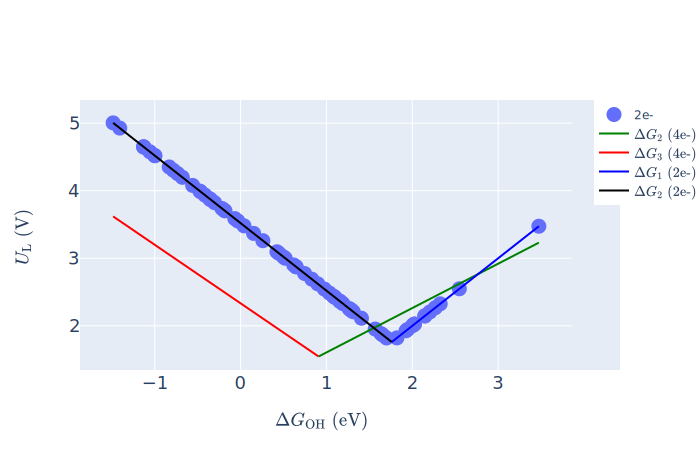

In [83]:
# Activity plot (combined)- based on 2e-

# linear regression for 4e- WOR
model_DG2 = LinearRegression()
X = df_cleaned.DG_OH.values.reshape(-1,1)
model_DG2.fit(X, df_cleaned.DG2)

x_range = np.linspace(X.min(), X.max(), 100)
y1_range = model_DG2.predict(x_range.reshape(-1,1))
(coef_DG2, intercept_DG2) = (model_DG2.coef_, model_DG2.intercept_)

model_DG3 = LinearRegression()
model_DG3.fit(X, df_cleaned.DG3)

x_range = np.linspace(X.min(), X.max(), 100)
y2_range = model_DG3.predict(x_range.reshape(-1,1))
(coef_DG3, intercept_DG3) = (model_DG3.coef_, model_DG3.intercept_)

# get volcano peak
x_peak = - (intercept_DG2 - intercept_DG3) / (coef_DG2 - coef_DG3)
y_peak = model_DG2.predict(x_peak.reshape(-1,1))


# revise x,y range for each region
x1_range = np.linspace(x_peak[0], X.max(), 100)
x2_range = np.linspace(X.min(), x_peak[0], 100)

y1_range = model_DG2.predict(x1_range.reshape(-1,1))
y2_range = model_DG3.predict(x2_range.reshape(-1,1))



# linear regression for 2e- WOR
model_DG1_2e = LinearRegression()
# X = df_cleaned.DG_OH.values.reshape(-1,1)
model_DG1_2e.fit(X, df_cleaned.DG1_2e)

x3_range = np.linspace(1.76, X.max(), 100)
y3_range = model_DG1_2e.predict(x3_range.reshape(-1,1))
(coef_DG1_2e, intercept_DG1_2e) = (model_DG1_2e.coef_, model_DG1_2e.intercept_)


model_DG2_2e = LinearRegression()
model_DG2_2e.fit(X, df_cleaned.DG2_2e)

x4_range = np.linspace(X.min(), 1.76, 100)
y4_range = model_DG2_2e.predict(x4_range.reshape(-1,1))
(coef_DG2_2e, intercept_DG2_2e) = (model_DG2_2e.coef_, model_DG2_2e.intercept_)
print(coef_DG1_2e, intercept_DG1_2e, coef_DG2_2e, intercept_DG2_2e)


# get plot
layout = go.Layout(height = 600, width = 600, # title = 'activity plot',
                   titlefont = dict(size = 25),
                   showlegend = True,
              #     plot_bgcolor = 'yellow'
              #     hovermode = 'closest'
                   )

trace_2e = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['UL_2e'], name = '2e-', text= df_cleaned['formula'],
                   textposition = 'top left',
                    mode = 'markers', marker = dict(size = 15, symbol = 0))
"""
trace_4e = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['UL_4e'], name = '4e-', text= df_cleaned['formula'],
                   textposition = 'top left',
                    mode = 'markers', marker = dict(size = 15, symbol = 0))
"""

trace1 = go.Scatter(x=x1_range, y= y1_range, name = r'$\Delta G_{\text{2}} \text{ (4e-)}$',
                    mode = 'lines', marker=dict(color = 'green'))

trace2 = go.Scatter(x=x2_range, y= y2_range, name = r'$\Delta G_{\text{3}} \text{ (4e-)}$',
                    mode = 'lines', marker=dict(color = 'red'))

trace3 = go.Scatter(x=x3_range, y= y3_range, name = r'$\Delta G_{\text{1}} \text{ (2e-)}$',
                    mode = 'lines', marker=dict(color = 'blue'))

trace4 = go.Scatter(x=x4_range, y= y4_range, name = r'$\Delta G_{\text{2}} \text{ (2e-)}$',
                    mode = 'lines', marker=dict(color = 'black'))

data = [trace_2e, trace1, trace2, trace3, trace4] # trace_4e

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text = r'$\Delta G_{\text{OH}} \text{ (eV)}$', 
                                       titlefont = dict(size = 30),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
fig.update_yaxes(title_text =  r'$ U_{\text{L}} \text{ (V)}$', titlefont = dict(size = 30),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)

# plot(fig, filename = 'plots/activity_plot_combined_v2.html', include_mathjax='cdn')
fig.show('svg')

# py.iplot(fig)

<div>
    <a href="https://plotly.com/~gwanyeong/32/?share_key=yUfm3DpaBAGYQKx7g7YseM" target="_blank" title="activity_plot" style="display: block; text-align: center;"><img src="https://plotly.com/~gwanyeong/32.png?share_key=yUfm3DpaBAGYQKx7g7YseM" alt="activity_plot" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="gwanyeong:32" sharekey-plotly="yUfm3DpaBAGYQKx7g7YseM" src="https://plotly.com/embed.js" async></script>
</div>
